In [1]:
import torch
import numpy as np
from ANN_model import Features12_NN
from Dataset import Features12_dataset
from Utils import loss_plot
from torch.utils.data import DataLoader
from Train import train_model

In [2]:
BATCH_SIZE = 100
RANDOM_STATE = 42

X = np.load('Numeric_feature_dataset/features12_norm_train.npy')
y = np.load('Numeric_feature_dataset/target_train.npy')
train_dataset = Features12_dataset(X, y, train=True, random_state=RANDOM_STATE)
test_dataset = Features12_dataset(X, y, train=False, random_state=RANDOM_STATE)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [3]:
model = Features12_NN()
model_trained, trainloss, testloss = train_model(model, train_loader, test_loader, num_epochs=1000, lr=0.01, weight_decay=1e-4, factor=0.5, min_lr=1e-6, patience=30, threshold=0.01)

[Epoch 1/1000] train_loss: 0.143, test_loss: 0.111 | train_mape: 29.80, test_mape: 24.70
[Epoch 2/1000] train_loss: 0.106, test_loss: 0.056 | train_mape: 27.67, test_mape: 21.55
[Epoch 3/1000] train_loss: 0.069, test_loss: 0.047 | train_mape: 25.31, test_mape: 20.16
[Epoch 4/1000] train_loss: 0.060, test_loss: 0.046 | train_mape: 23.81, test_mape: 19.43
[Epoch 5/1000] train_loss: 0.059, test_loss: 0.046 | train_mape: 22.90, test_mape: 19.01
[Epoch 6/1000] train_loss: 0.056, test_loss: 0.048 | train_mape: 22.20, test_mape: 18.60
[Epoch 7/1000] train_loss: 0.054, test_loss: 0.046 | train_mape: 21.66, test_mape: 18.46
[Epoch 8/1000] train_loss: 0.056, test_loss: 0.051 | train_mape: 21.28, test_mape: 18.52
[Epoch 9/1000] train_loss: 0.053, test_loss: 0.041 | train_mape: 20.93, test_mape: 18.24
[Epoch 10/1000] train_loss: 0.051, test_loss: 0.043 | train_mape: 20.63, test_mape: 18.10
[Epoch 11/1000] train_loss: 0.050, test_loss: 0.045 | train_mape: 20.35, test_mape: 17.99
[Epoch 12/1000] tra

In [4]:
from Utils import save_with_unique_name 
#### 記得改檔名 ####
filename = 'Models/features12_model4.pt'
filename = save_with_unique_name(filename)
torch.save(model_trained.state_dict(), filename)

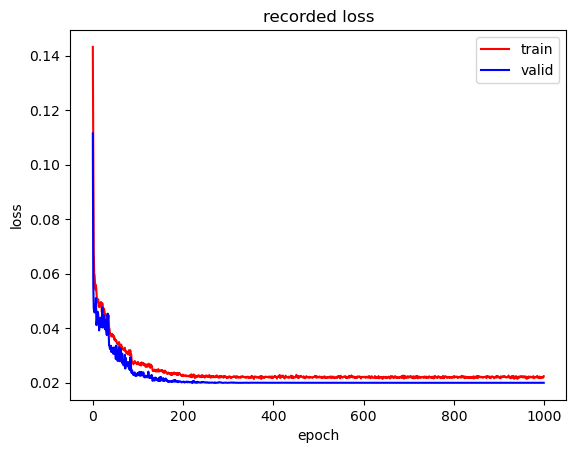

In [5]:
loss_plot(trainloss, testloss)

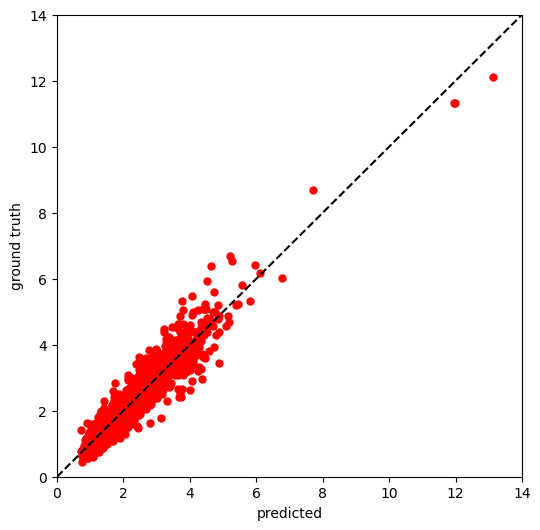

In [6]:
from Utils import true_pred_plot, model_pred

pred_test, true_test = model_pred(model_trained, test_loader)
true_pred_plot(np.exp(pred_test), true_test)

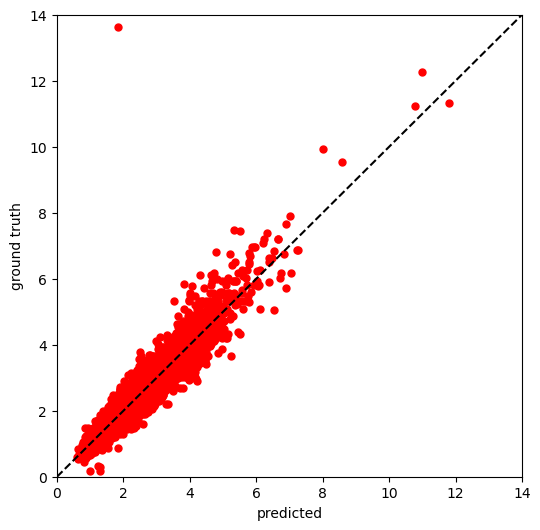

In [7]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)
pred_train, true_train = model_pred(model_trained, train_loader)
true_pred_plot(np.exp(pred_train), true_train)